# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/Users/navina/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


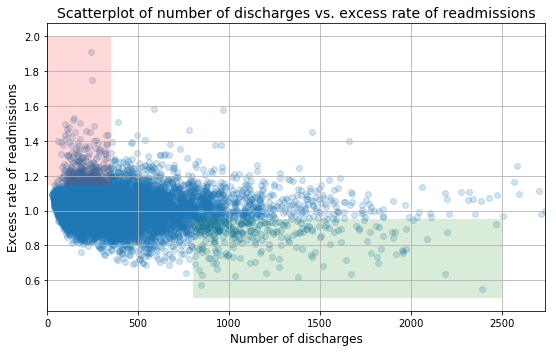

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

### A. Do you agree with the above analysis and recommendations? Why or why not?

Though it looks like there is direct correlation between the number of discharges and readmission rates,only the outliers are being looked at to make the correlations. 

"rate of readmissions is trending down with increasing number of discharges": this seems like a claim made by looking purely at the huge outliers. 

"in hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 64% have excess readmission rate greater than 1": what % of the total population has a discharge < 100? 

Since the scatter plot combines all the nearby data, it is very difficult to see how desnse the plot is near the middle-left side. So I am very hesistant to make any conclusions based off of any of the claims from this plot.

### B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

I would like to see if there is actual correlation between the number of discharges at a hospital and the rate of readmissions. We will set up a hypothesis testing with the below structure:

we will compute the pearson correlation, and set that as our baseline statistics.
We will assume there is no correlation between the data, and take permutation samples.
then we will test if the correlation from the observed data is a likely value from the bootstrapped data.

In [6]:
s_discharge = clean_hospital_read_df['Number of Discharges'][81:-3]
s_readmission = clean_hospital_read_df['Excess Readmission Ratio'][81:-3]

In [7]:
#function to compute the pearson correlation coefficient between two arrays
def pearson_r(x,y):
    corr_mat = np.corrcoef(x,y)
    return corr_mat[0,1]

def p_value(array, value):
    return (value - np.mean(array))/np.std(array)

In [9]:
correlation_obs = pearson_r(s_discharge.values, s_readmission.values)
print(correlation_obs)

-0.0930955428759


In [10]:
# 1) permutation test: check if there is no correlation between discharges and readmission ratio
# 2) permute the data on discharges, leave the readmission ratio as it is, compute  pearson correlation.
# 3) compare observed correlation to simulated correlation value 
# approach used: https://campus.datacamp.com/courses/statistical-thinking-in-python-part-2/hypothesis-test-examples?ex=7

num_trials = 10000
list_correlations = np.empty(10000)

for index in range(num_trials):
    l_discharge = np.random.permutation(s_discharge.values)
    l_readmission = s_discharge.values
    list_correlations[index] = pearson_r(l_discharge, l_readmission)

In [ ]:
# from scipy import stats
# stats.kstest(list_correlations, 'norm')

In [12]:
#here, we will compute the p-value of the observed.
p_value(list_correlations, correlation_obs)

-10.05895928426038


From the above p-value of -10, it is very unlikely that there is no correlation between the two features. This is strong evidence against the null hypothesis, and fair to say there is some form of correlation between them.

In [15]:
#report statistical significancec where aa = 0.01
interval = np.percentile(list_correlations, [0.005, 99.995])
print('statistical significance for aa=0.01 is:', interval)

statistical significance for aa=0.01 is: [-0.03429531  0.03728595]


In terms of the scatterplot, the pros would be that outliers are very easy to find. However since the area where the data is dense gets very hard to understand, it is difficult to get a sense of how much data is represented. We need a graph which can handle outliers well but still depict the overall trend without these outliers affecting the visualization. I suggest a series of boxplots with binning which can be seen below. What we do is the following:

since the number of hospitals with high number of discharges are very sparse, we will take the log of the number of discharges column, and create bins using the hist function.
Then using those bins, we will categorize each datapoint into the bins, and plot a boxplot for each bins.

In [17]:
data = clean_hospital_read_df[['Number of Discharges', 'Excess Readmission Ratio']][81:-3]
x = data['Number of Discharges']
y = data['Excess Readmission Ratio']

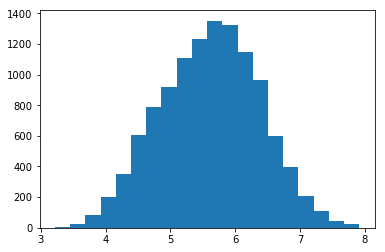

In [18]:
#create bins with the log of the number of discharges column.
n, bins, patches = plt.hist(np.log(data['Number of Discharges']), bins=20)
bins[0] = bins[0] - 0.1

In [19]:
#create the log discharges column in the dataframe.
data['log discharges'] = np.log(data['Number of Discharges'])
tmp_data = data.drop('Number of Discharges', axis=1)
tmp_data['bins'] = pd.cut(tmp_data['log discharges'], bins)

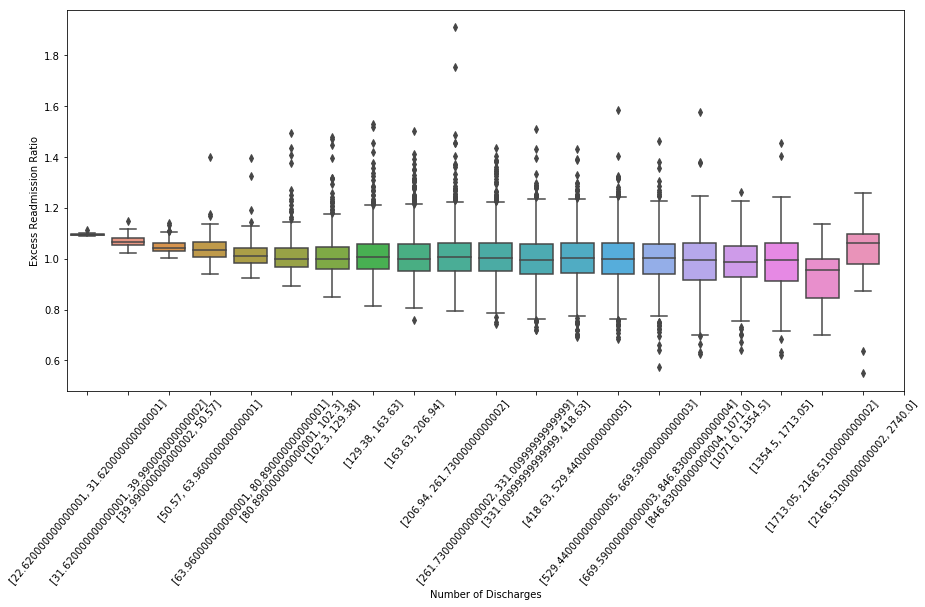

In [20]:
import seaborn as sns
#create matplotlib figure and axes
fid, ax = plt.subplots(figsize=(15,7))
sns.boxplot(ax=ax, x='bins',y='Excess Readmission Ratio', data=tmp_data)
orig_bins = np.exp(bins)
new_labels = []

#here we create the xticks such that the original number of discharges are kept.
for i in range(len(orig_bins)-1):
    new_labels.append([round(orig_bins[i],2), round(orig_bins[i+1],2)])

#ax = sns.boxplot(x='bins',y='Excess Readmission Ratio', data=tmp_data)
#ax.xticks(bins, bins)
plt.xticks([i for i in range(len(bins))], [i for i in new_labels], rotation=50)
_ = plt.xlabel('Number of Discharges')

The boxplots above show that  there is some decrease in readmission ratio with increase in number of discharges, but after the [63.96, 80.89] datapoint, there is no significant decrease. An increase in the number of discharges does not necessarily mean the readmission ratio will decrease.